
# TP Clustering
### Diane LINGRAND 

diane.lingrand@univ-cotedazur.fr 

SI4 2022-23

In [1]:
#import the necessary libraries
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt

# Experiments on synthetic data
In this section, everything is almost already done: read carefully the codes, observe the results, play with parameters. It is very important that you understand everything in this part.

## Generating blobs

In [2]:
from sklearn.datasets import make_blobs

In [3]:
n_samples = 1500
random_state = 160
#random_state is the seed for the random generation and let you reproduce the exact same dataset
X, y = make_blobs(centers=3, n_samples=n_samples, random_state=random_state)


### Drawing the data

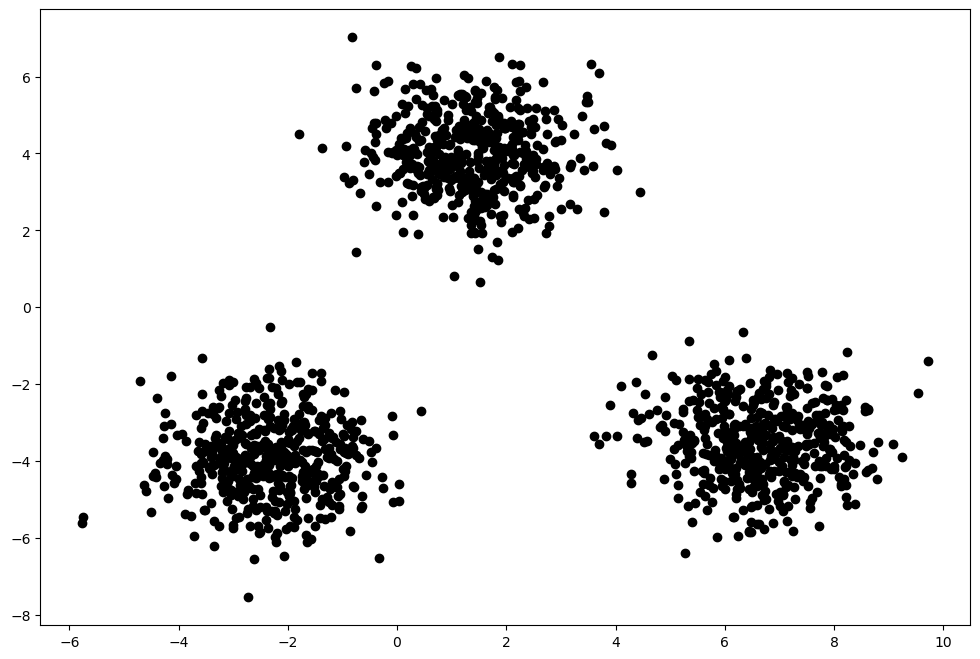

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c='k')
plt.show()

## Clustering method: k-means
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html !

In [5]:
from sklearn.cluster import KMeans

In [6]:
nbClusters = 3

### Initialisation of the centroids

Read **carefully** the next 4 cells: they present different possible construction of k-means clustering objects. Before choosing the one that you will use, understand the different parameters.

In [ ]:
## basic kmean with random initialisation
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='random')

In [ ]:
## random initialisation but using fixed seed for reproducing the experiments
random_state2 = 150
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='random', random_state=random_state2)

In [7]:
## fixed initialisation of the centroid (no random)
c = np.array([[2,2],[1,5],[2,-4]]) #this is a bad init. try also c=np.array([[5,5],[8,2],[7,2]])
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init=c)

In [7]:
## random initialisation using heuristic 'k-means++' 
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='k-means++')
# you could also increase n_init parameter for trying different initialisation of the centroids

- **the max_iter** parameter corresponds to the number of times the k_means algorithm will iterate after the initial points are chosen, each iteration changes the centroids of the clusters.
- **the n_init** parameter chooses the number of times the k-means algorithm will be run, each run with different starting centroids, then the run resulting in the lowest inertia (sum of squared distances between points and their assigned centroids) is selected as the final outcome.
- **init** corresponds the way the initial centroids are defined, could be random, specific centroid list or k-means.
  The 'k-means++' method selects initial cluster centers in a smart way to speed up convergence. It is often more efficient than   random initialization.


### Learning and prediction

In [8]:
#learning and computing the result:
y_pred = km.fit_predict(X)

### Visualisation of the clustering result.

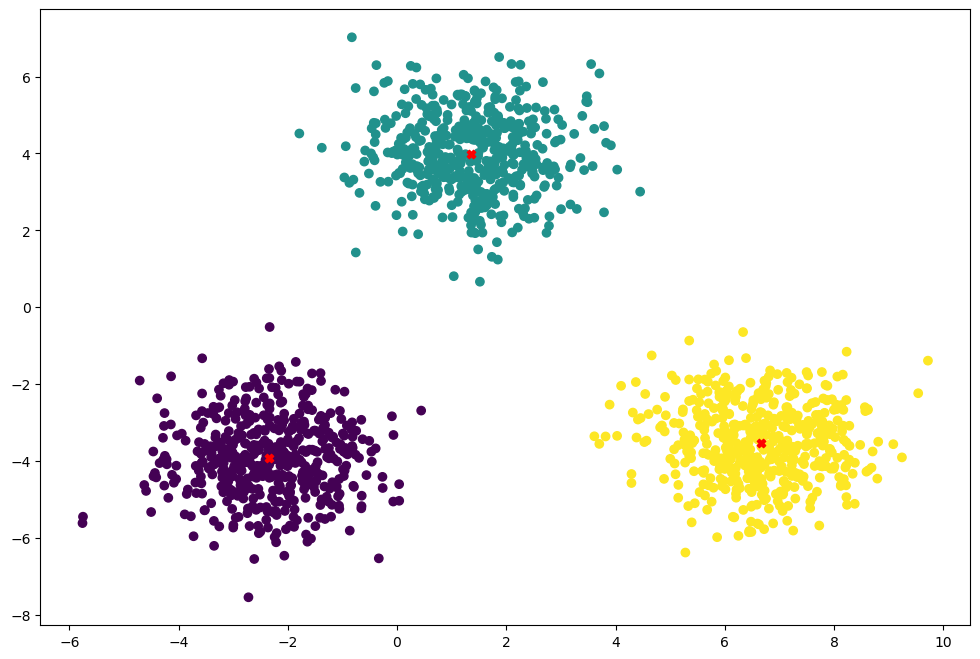

In [9]:
plt.figure(figsize=(12, 8))
#we use the predicted label (or cluster) as a color for the samples
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
c=km.cluster_centers_
#we plot centroids in red
plt.scatter(c[:,0],c[:,1],c='r',marker="X")
plt.show()

## Clustering method: k-medoid
Don't hesitate to read the doc: https://scikit-learn-extra.readthedocs.io/en/latest/generated/sklearn_extra.cluster.KMedoids.html !

Vous aurez besoin d'installer sklearn-extra. *You need to install sklearn-extra*:

In [11]:
!pip install scikit-learn-extra

     -------------------------------------- 346.2/346.2 kB 2.4 MB/s eta 0:00:00


In [22]:
from sklearn_extra.cluster import KMedoids
km1 = KMedoids(n_clusters=nbClusters, max_iter=10, init='random')

Change the init parameters to ‘k-medoids++’ or other parameters and observe the differences.

In [30]:
km1 = KMedoids(n_clusters=nbClusters, max_iter=10, init='k-medoids++')
y_pred = km1.fit_predict(X)

Don't forget to visualize the results!

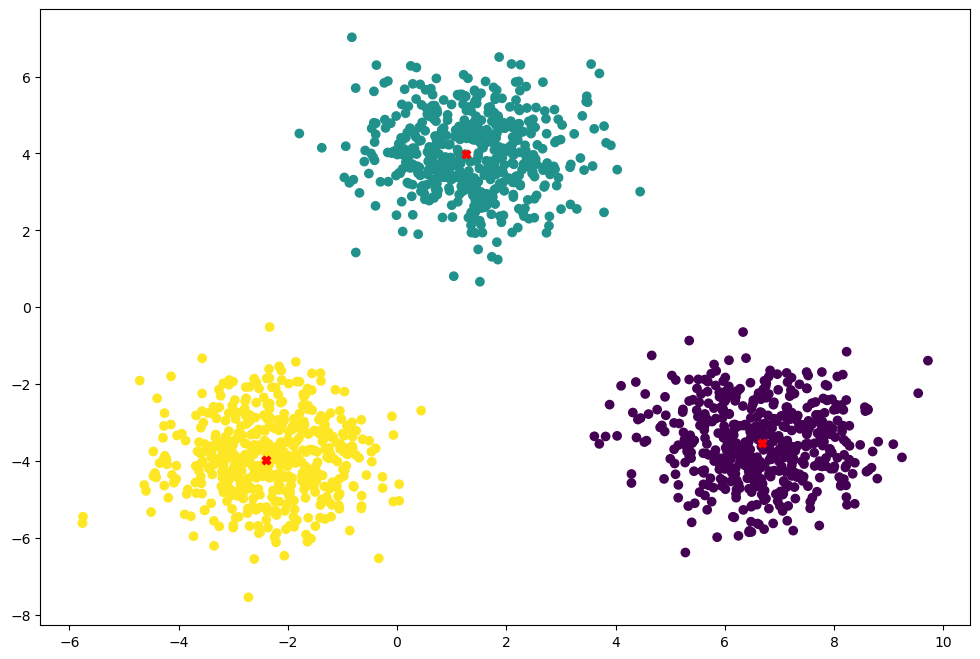

In [31]:
plt.figure(figsize=(12, 8))
#we use the predicted label (or cluster) as a color for the samples
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
c=km1.cluster_centers_
#we plot centroids in red
plt.scatter(c[:,0],c[:,1],c='r',marker="X")
plt.show()

## Clustering method: agglomerative clustering
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [32]:
from sklearn.cluster import AgglomerativeClustering

Testing different linkage could be a good idea!

In [33]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
#play with the linkages
y_pred = ac.fit_predict(X)

- **n_clusters=3:** This parameter specifies that the algorithm should create three clusters from the data. You can adjust this value depending on how many distinct groups you believe exist in your data or based on domain knowledge.

- **affinity='euclidean':** The affinity parameter determines the metric used to compute the linkage. In this case, 'euclidean' means it's using Euclidean distance to measure the distance between data points.

- **linkage='ward':** The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. 'ward' minimizes the variance of the clusters being merged. Other common linkage criteria include 'complete', 'average', and 'single'.

***Affinity is the metric used to determine the distance between data points, the linkage is the metric used to determine the distance between clusters***

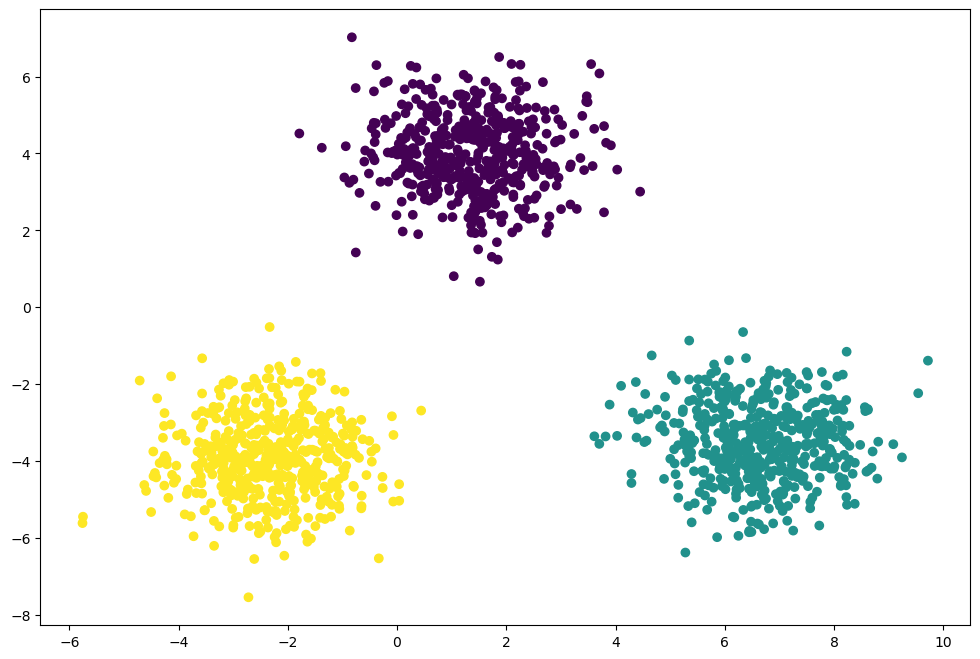

In [34]:
plt.figure(figsize=(12, 8))
#we use the predicted label (or cluster) as a color for the samples
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## Clustering method: DBSCAN
Don't hesitate to read the doc: https://scikit-learn.org/dev/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN

In [36]:
from sklearn.cluster import DBSCAN

In [48]:
db = DBSCAN(eps=0.5, min_samples=10)
y_pred=db.fit_predict(X)

#noisy points will be labelled as -1: choose a special color (black ?) for those noisy points
nbClusters = max(y_pred)+1
nbNoise = list(y_pred).count(-1)

print('Number of clusters: ', nbClusters)
print('Number of noisy samples: ', nbNoise)


Number of clusters:  3
Number of noisy samples:  74


**Density-based clustering** involves grouping data points together based on their proximity to each other in the feature space, with the assumption that a cluster in space is a dense region of data points separated by sparser regions. One popular density-based clustering algorithm is DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN works by defining a neighborhood around each data point, and if a sufficient number of points are found within this neighborhood, a cluster is formed. This process continues until the dense regions of points are fully explored, resulting in distinctly formed clusters. DBSCAN is particularly effective for data that contains noise and for identifying clusters of arbitrary shapes and sizes, as it can segregate noise and outliers and doesn't require the user to pre-specify the number of clusters.






nb of noise pts 74


C:\Users\ibrah\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


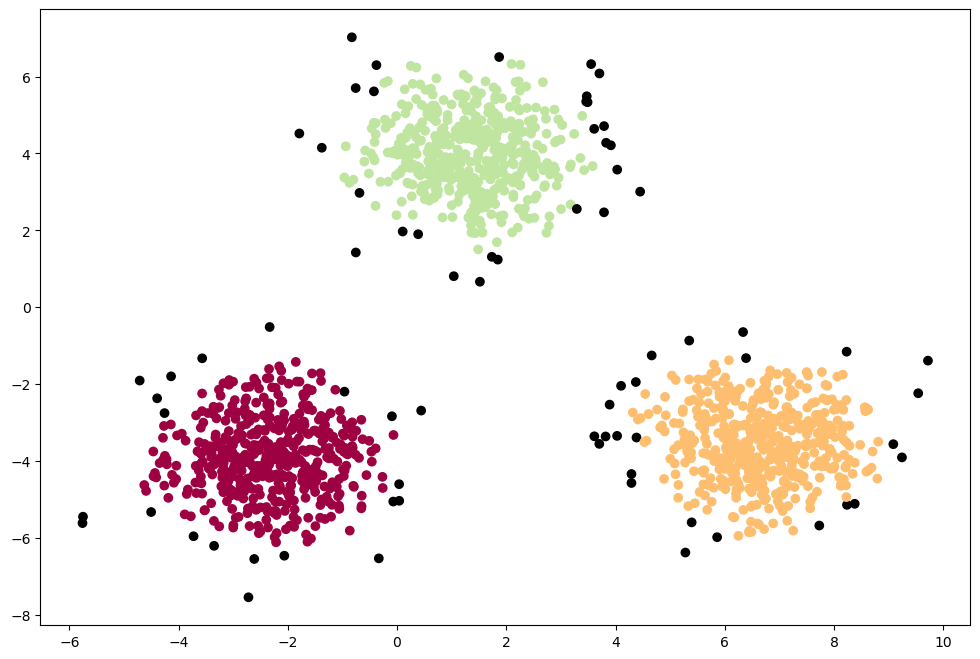

In [49]:
plt.figure(figsize=(12, 8))
# Count the noise points
nbNoise = np.sum(y_pred == -1)
print("nb of noise pts",nbNoise)
# Use conditional coloring to color noise points as black
colors = ['black' if label == -1 else plt.cm.Spectral(label / nbClusters) for label in y_pred]
plt.scatter(X[:, 0], X[:, 1], c=colors)

plt.show()

## Evaluation methods
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

In [50]:
from sklearn import metrics

In [51]:
silhouetteScore = metrics.silhouette_score(X, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Silhouette Coefficient: 0.70


**Code for plotting silhouettes.** From https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

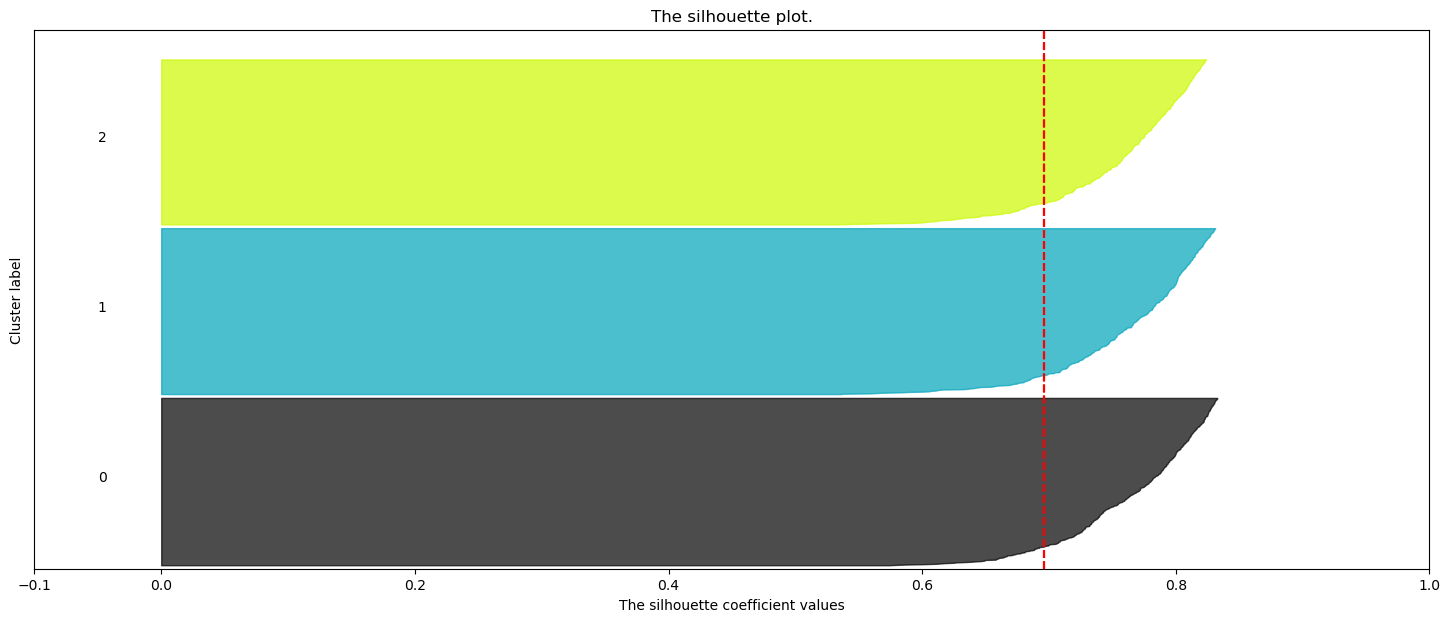

In [52]:
import matplotlib.cm as cm

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
y_lower = 10
#loop over clusters
for i in range(nbClusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Experiments on digit dataset
**We give you some code in this part (loading data, standardisation and visualisation) as hints but you have to test the previous clustering algorithms yourself on this digit dataset.**

In order to compare the clustering results with the original classes of the data, we will use 2 codes:
- color for the cluster number: colors = [cm.nipy_spectral(float(i) / 10) for i in range(10)]
- shape for the original class: caracters corresponding to class digit

y is the variable for the true class of each sample

ypred is the variable for the predicted cluster number of each sample (you need to use a clustering method in order to compute ypred)

X2 is the result of a dimension reduction to 2 of the data (embedded space)

**BE CAREFUL THAT THE CLUSTERING OPERATION SHOULD NOT BE DONE IN THE EMBEDDED SPACE!**

### Loading the data

In [57]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

### Data standardisation

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

### using TSNE

C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


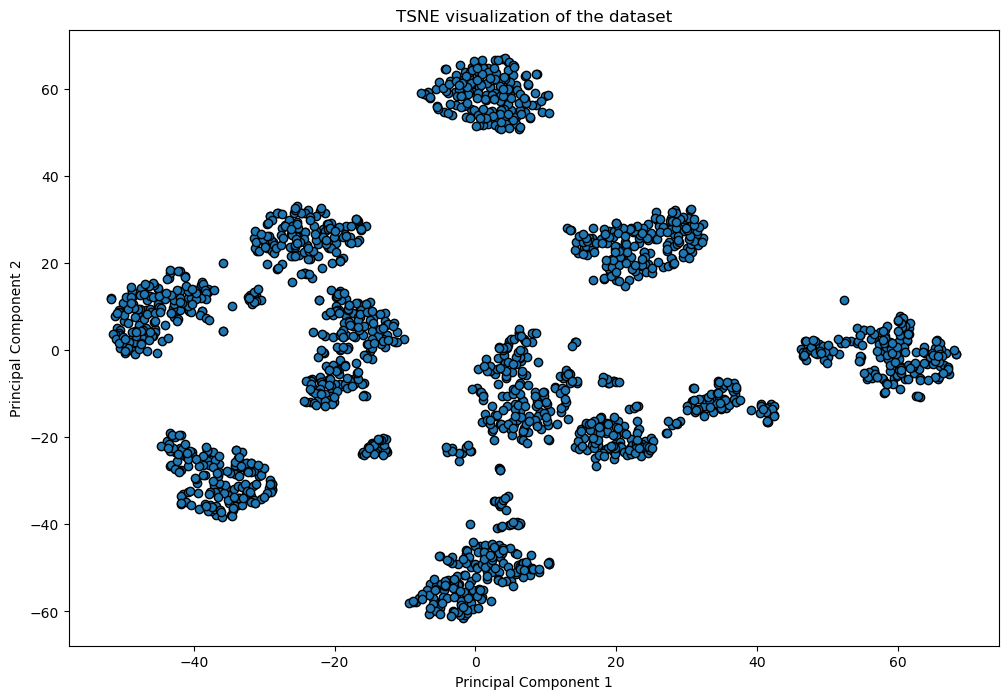

In [126]:
from sklearn import manifold
import matplotlib.pyplot as plt
tsne = manifold.TSNE(n_components=2, init='pca', perplexity=30)
X_result = tsne.fit_transform(X)
plt.figure(figsize=(12, 8))
plt.scatter(X_result[:, 0], X_result[:, 1], edgecolor='k')
plt.title('TSNE visualization of the dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Functions to visualize the final graph and the silhouette

In [228]:
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.stats
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, confusion_matrix


def calculate_silhouette(X, labels):
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)
    return silhouette_avg, sample_silhouette_values

def plot_silhouette(ax, silhouette_avg, sample_silhouette_values, labels, n_clusters):
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_xlim([-0.2, 1])
    
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

def calculate_metrics(real_labels, predicted_labels):
    accuracy = accuracy_score(real_labels, predicted_labels)
    confusion = confusion_matrix(real_labels, predicted_labels)
    return accuracy, confusion

def plot_clustering(clustering_model, X, n_clusters, real_labels):
    y_pred = clustering_model.fit_predict(X)
    permutation = find_permutation(n_clusters, real_labels, y_pred)
    
    # Apply the permutation to cluster labels
    y_pred_mapped = np.array([permutation[cluster] for cluster in y_pred])

    sil_avg, sil_values = calculate_silhouette(X, y_pred_mapped)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 10)

    plot_silhouette(ax1, sil_avg, sil_values, y_pred_mapped, n_clusters)

    colors = cm.nipy_spectral(y_pred_mapped.astype(float) / n_clusters)
    scatter = ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    if hasattr(clustering_model, 'cluster_centers_'):
        centers = clustering_model.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], c='red', marker="X", edgecolor='k')

    # Calculate and display metrics
    accuracy, confusion = calculate_metrics(real_labels, y_pred_mapped)
    ax2.set_title(f'Accuracy: {accuracy:.2f}\nConfusion Matrix:\n{confusion}')

    # Adding a legend for cluster labels
    legend1 = ax2.legend(*scatter.legend_elements(), title="Clusters")
    ax2.add_artist(legend1)

    plt.show()
    
def plot_clustering_dbscan(clustering_model, X):
    y_pred = clustering_model.fit_predict(X)
   #noisy points will be labelled as -1: choose a special color (black ?) for those noisy points
    n_clusters = max(y_pred)+1
    n_noise = list(y_pred).count(-1)

    # Plotting the clusters
    plt.figure(figsize=(10, 8))
    colors = ['black' if label == -1 else plt.cm.inferno(label / n_clusters) for label in y_pred]
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    plt.title(f"DBSCAN Clustering\nNumber of clusters: {n_clusters}, Number of noise points: {n_noise}")
    plt.show()


### clustering using k-means

C:\Users\ibrah\AppData\Local\Temp\ipykernel_10936\3398312565.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
C:\Users\ibrah\anaconda3\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


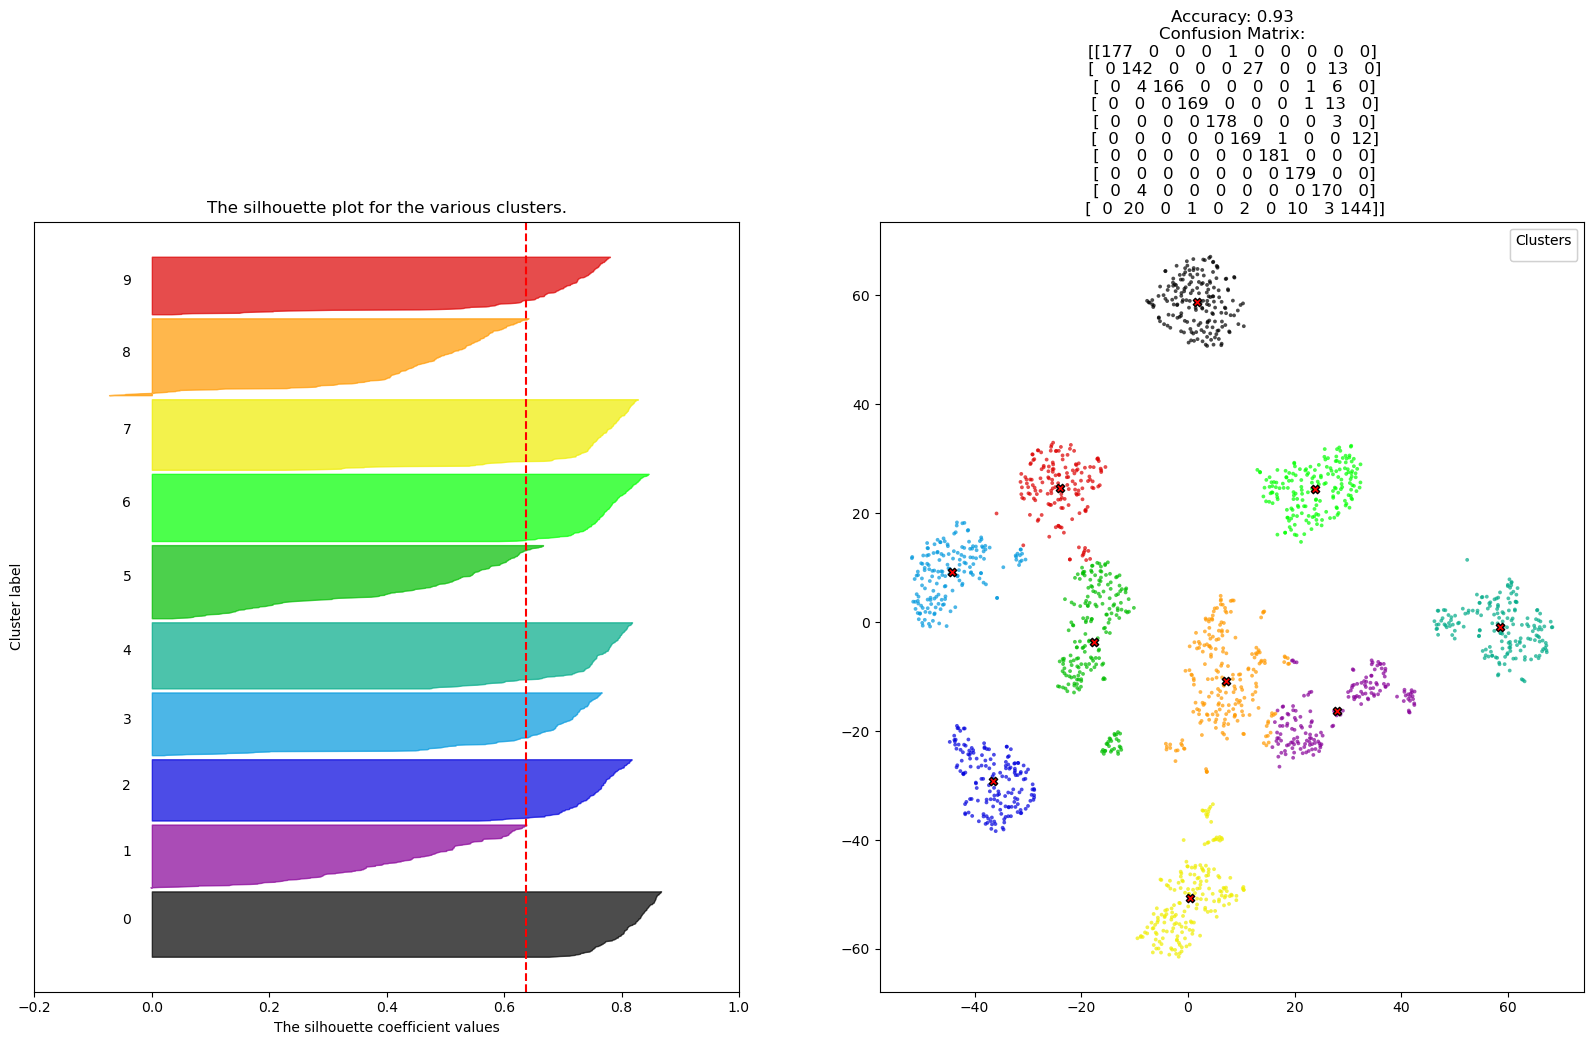

In [229]:
km = KMeans(n_clusters=10, max_iter=10, n_init=1, init='k-means++')
plot_clustering(km, X_result, 10,y)

### clustering using K-medoids

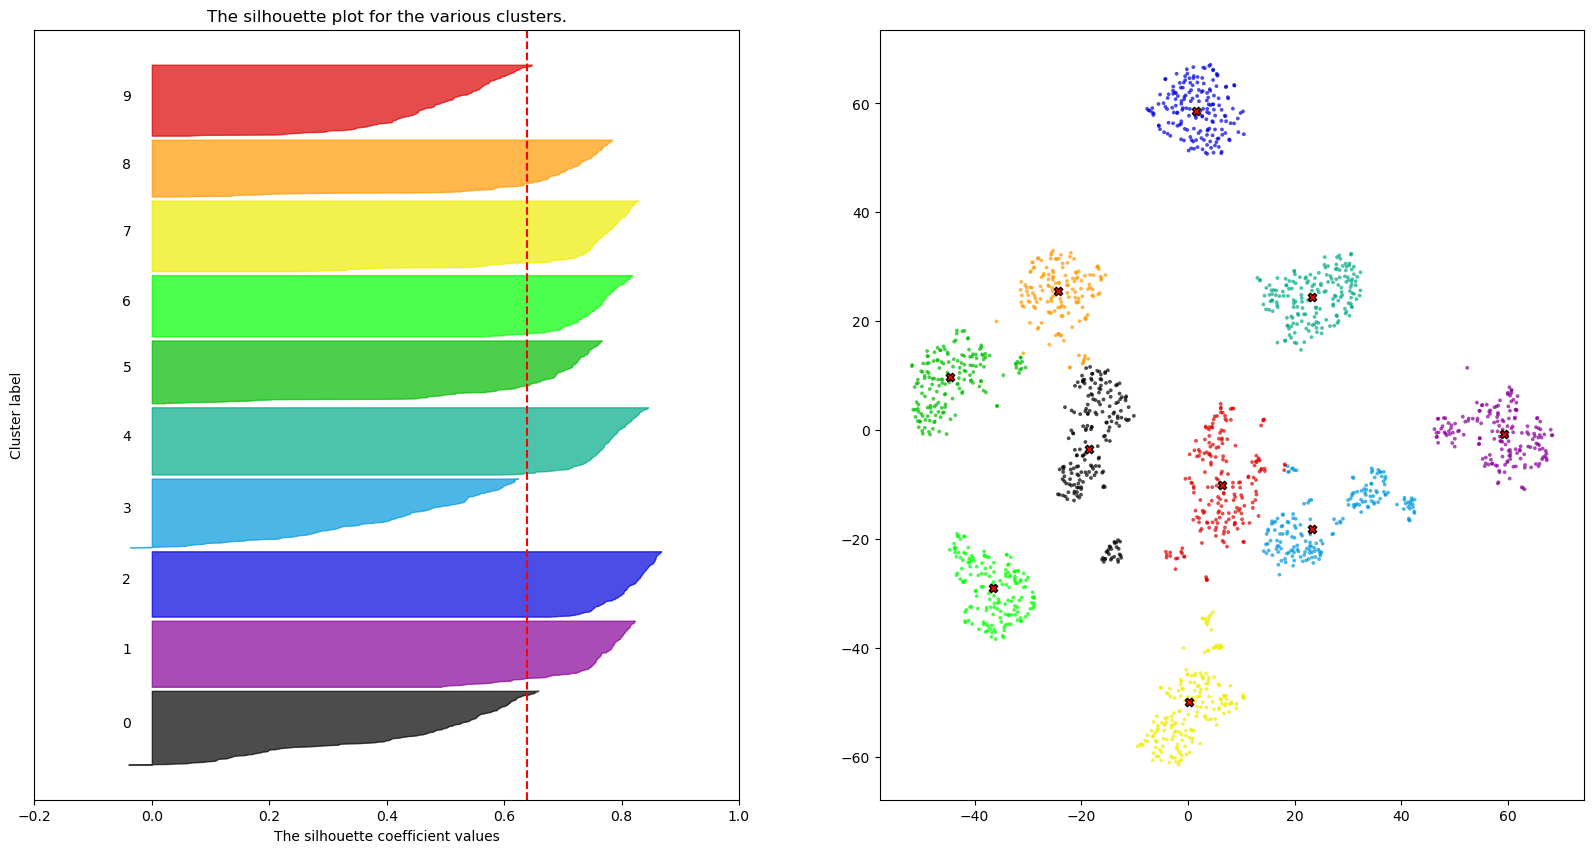

In [216]:
km = KMedoids(n_clusters=10, max_iter=15, init='k-medoids++')
plot_clustering(km, X_result, 10)

### agglomeration clustering

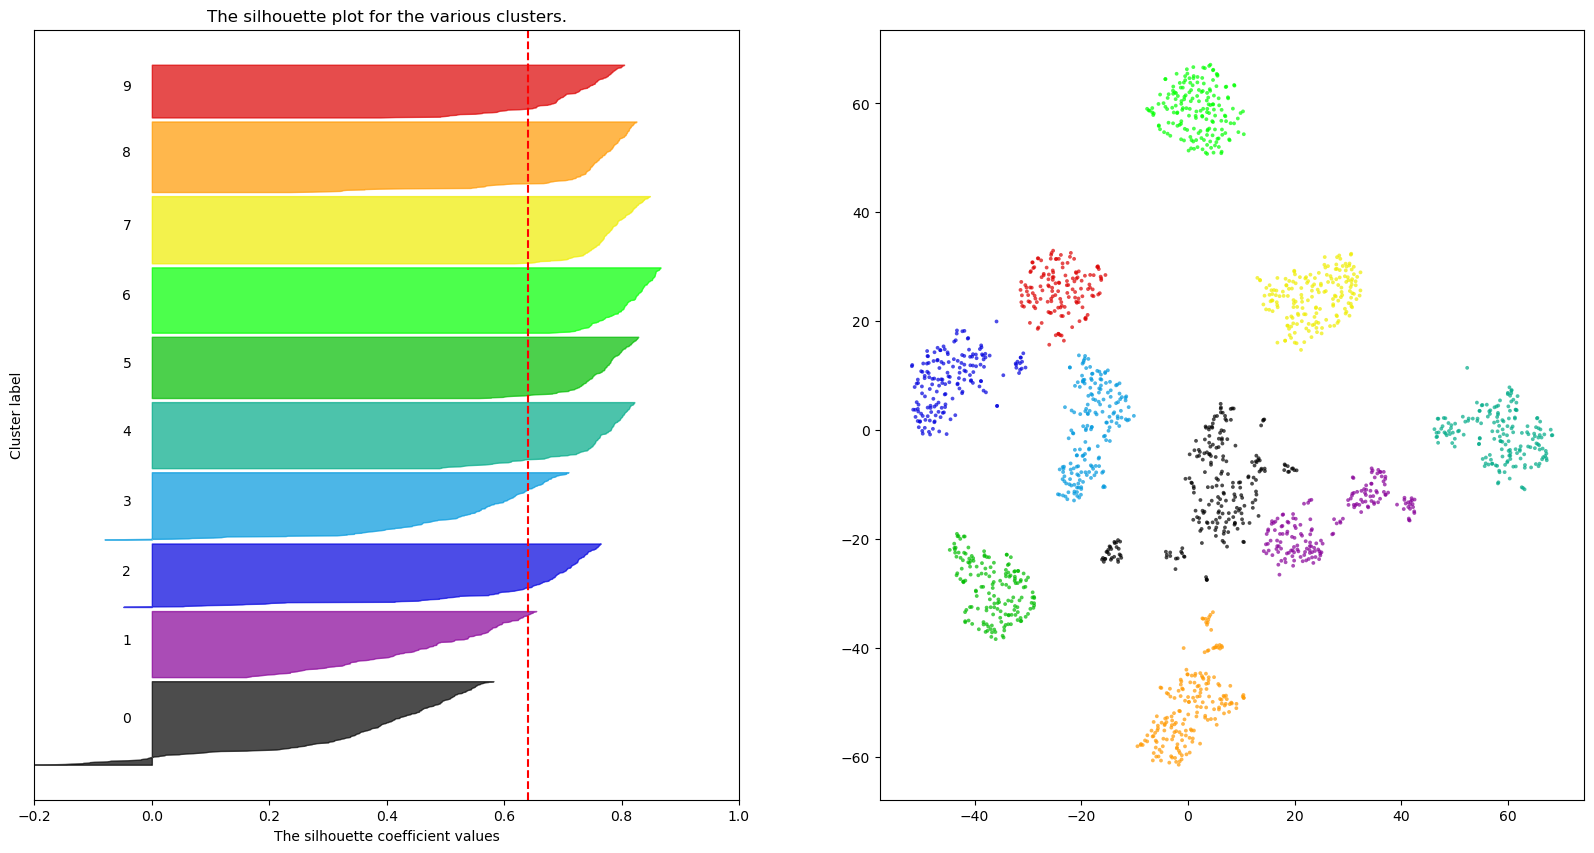

In [217]:
ac = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
plot_clustering(ac, X_result, 10)


### density based clustering

C:\Users\ibrah\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


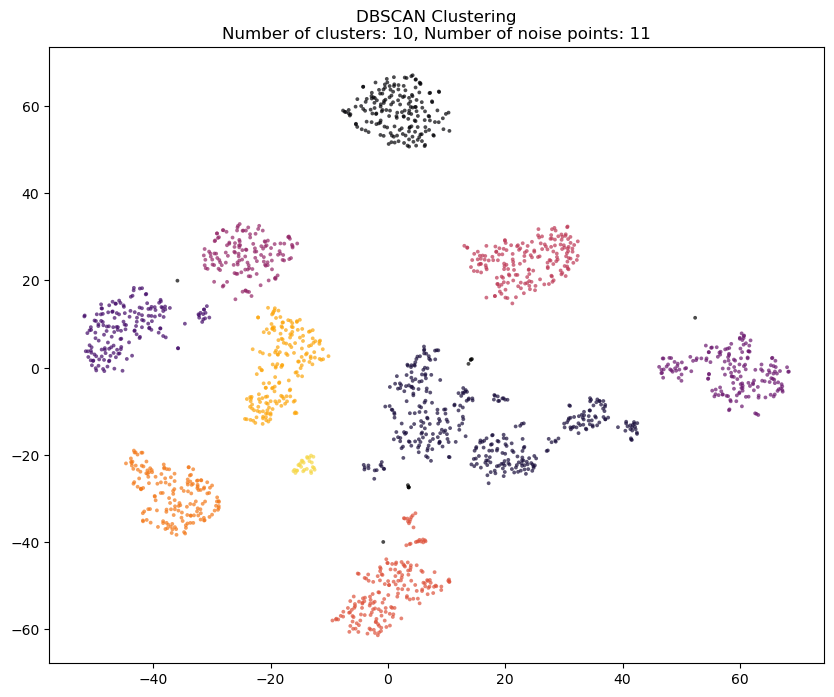

In [220]:
db = DBSCAN(eps=4, min_samples=10)
plot_clustering_dbscan(db,X_result)
